# Exploratory Data Analysis on Haberman Dataset

# Description:
The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

# Objective:
To predict whether the patients who had undergone surgery will survive for (five years or longer) or (die within five years)

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
#loading the Haberman dataset into a pandas Dataframe
HM=pd.read_csv('haberman.csv')
HM

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
...,...,...,...,...
301,75,62,1,1
302,76,67,0,1
303,77,65,3,1
304,78,65,1,2


# Description of the Dataset:
    Age   : Age of patient at the time of Surgery
    Year  : Patient's year of operation
    Nodes : number of positive auxillary nodes detected
    Status: Survival status(1=patient survived 5 years or longer, 2=patient died with in 5 years)

In [9]:
#How many data points and features?
print(HM.shape)

(306, 4)


In [10]:
#How many data points for each class?
HM['status'].value_counts()

1    225
2     81
Name: status, dtype: int64

### OBSERVATIONS:
    1.The dataset is unbalanced.
    2.About 73.5% patients survived for 5 years or longer.

# UNIVARIATE ANALYSIS


# 1. HISTOGRAM

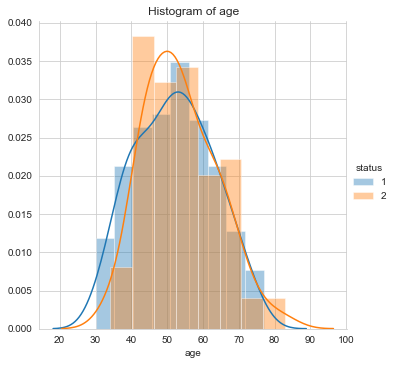

In [27]:
#Histogram of 'Age'
sns.FacetGrid(HM,hue='status',height=5)\
.map(sns.distplot,'age')\
.add_legend();
plt.title('Histogram of age');
plt.show();


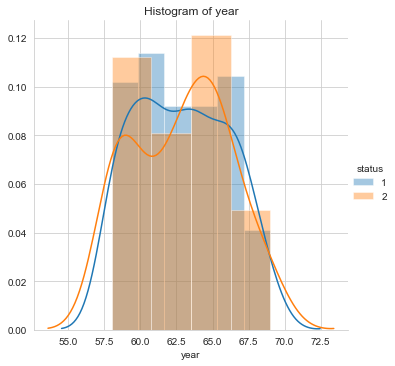

In [28]:
#Histogram of 'year
sns.FacetGrid(HM,hue='status',size=5)\
.map(sns.distplot,'year')\
.add_legend();
plt.title('Histogram of year')
plt.show();

### OBSERVATION:
    In both the Histograms(age and year),status 1 and 2 are almost overlapping. so we cannot differentiate them easily

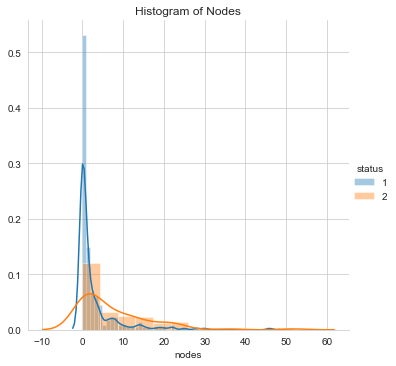

In [31]:
#Histogram of 'Nodes'
sns.FacetGrid(HM,hue='status',size=5)\
.map(sns.distplot,'nodes')\
.add_legend()
plt.title('Histogram of Nodes')
plt.show()

### OBSERVATIONS:
    1.The patients who had 0-1 positive auxillary nodes survived(most of them) for five years or longer.
    2.As the number of nodes increasing, the patients who died within 5 years are more than survived. 

# 2. PDF and CDF

[0.05333333 0.10666667 0.12444444 0.09333333 0.16444444 0.16444444
 0.09333333 0.11111111 0.06222222 0.02666667]
[30.  34.7 39.4 44.1 48.8 53.5 58.2 62.9 67.6 72.3 77. ]


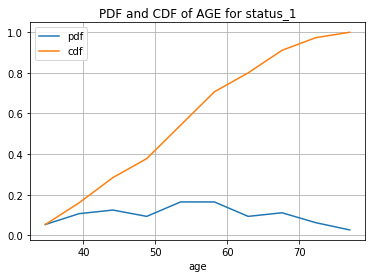

[0.03703704 0.12345679 0.19753086 0.19753086 0.13580247 0.12345679
 0.09876543 0.04938272 0.02469136 0.01234568]
[34.  38.9 43.8 48.7 53.6 58.5 63.4 68.3 73.2 78.1 83. ]


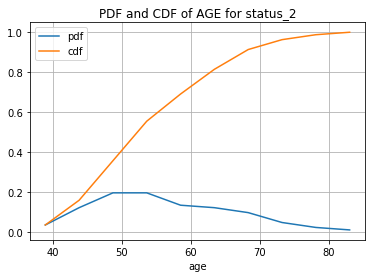

In [14]:
#PDF and CDF of age for status_1 and status_2
#status_1=person lived 5 years or longer
#status_2=person died within 5 years
status_1=HM.loc[HM['status']==1];
status_2=HM.loc[HM['status']==2];

counts,bin_edges=np.histogram(status_1['age'],bins=10,density=True)
pdf=counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label='pdf')
plt.plot(bin_edges[1:],cdf,label='cdf')
plt.xlabel('age')
plt.title('PDF and CDF of AGE for status_1')
plt.legend()
plt.grid()
plt.show();


counts,bin_edges=np.histogram(status_2['age'],bins=10,density=True)
pdf=counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label='pdf')
plt.plot(bin_edges[1:],cdf,label='cdf')
plt.xlabel('age')
plt.title('PDF and CDF of AGE for status_2')
plt.legend()
plt.grid()
plt.show();



[0.18666667 0.10666667 0.10222222 0.07111111 0.09777778 0.10222222
 0.06666667 0.09777778 0.09333333 0.07555556]
[58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]


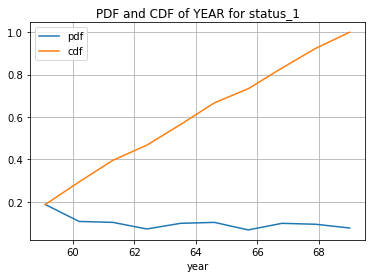

[0.25925926 0.04938272 0.03703704 0.08641975 0.09876543 0.09876543
 0.16049383 0.07407407 0.04938272 0.08641975]
[58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]


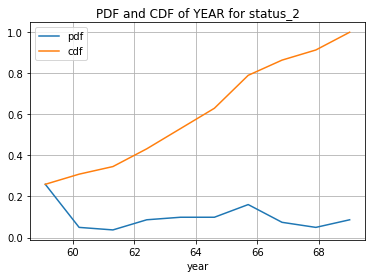

In [15]:
#PDF and CDF of year for status_1 and status_2
#status_1=person lived 5 years or longer
#status_2=person died within 5 years
status_1=HM.loc[HM['status']==1];
status_2=HM.loc[HM['status']==2];

counts,bin_edges=np.histogram(status_1['year'],bins=10,density=True)
pdf=counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label='pdf')
plt.plot(bin_edges[1:],cdf,label='cdf')
plt.xlabel('year')
plt.title('PDF and CDF of YEAR for status_1')
plt.legend()
plt.grid()
plt.show();


counts,bin_edges=np.histogram(status_2['year'],bins=10,density=True)
pdf=counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label='pdf')
plt.plot(bin_edges[1:],cdf,label='cdf')
plt.xlabel('year')
plt.title('PDF and CDF of YEAR for status_2')
plt.legend()
plt.grid()
plt.show();


[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]


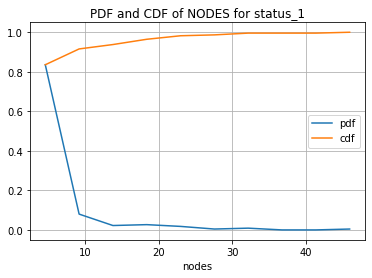

[0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


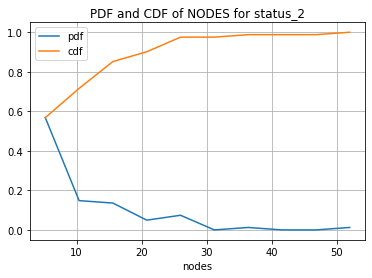

In [16]:
#PDF and CDF of nodes for status_1 and status_2
#status_1=person lived 5 years or longer
#status_2=person died within 5 years
status_1=HM.loc[HM['status']==1];
status_2=HM.loc[HM['status']==2];

counts,bin_edges=np.histogram(status_1['nodes'],bins=10,density=True)
pdf=counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label='pdf')
plt.plot(bin_edges[1:],cdf,label='cdf')
plt.xlabel('nodes')
plt.title('PDF and CDF of NODES for status_1')
plt.legend()
plt.grid()
plt.show();


counts,bin_edges=np.histogram(status_2['nodes'],bins=10,density=True)
pdf=counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label='pdf')
plt.plot(bin_edges[1:],cdf,label='cdf')
plt.xlabel('nodes')
plt.title('PDF and CDF of NODES for status_2')
plt.legend()
plt.grid()
plt.show();


### OBSERVATIONS:
    1.About 90% people who survived for 5 years or more had nodes less than 10.
    2.About 65% people who died within 5 years also had nodes less than 10.

# BOX PLOT AND WHISKERS

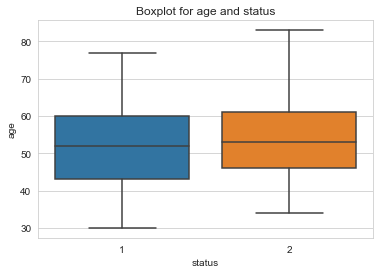

In [32]:
#Boxplot for age and status
sns.boxplot(x='status',y='age',data=HM)
plt.title('Boxplot for age and status')
plt.show()

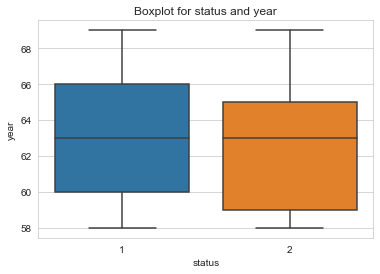

In [33]:
#Boxplot for status and year 
sns.boxplot(x='status',y='year',data=HM)
plt.title('Boxplot for status and year')
plt.show()

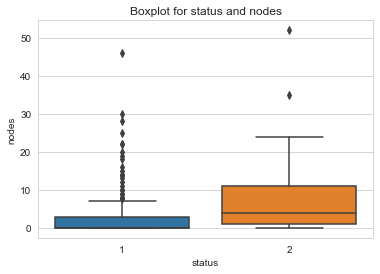

In [34]:
#Boxplot for status and nodes
sns.boxplot(x='status',y='nodes',data=HM)
plt.title('Boxplot for status and nodes')
plt.show()

# VIOLIN PLOTS

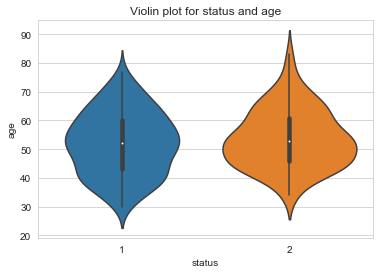

In [35]:
#Violin plot for status and age
sns.violinplot(x='status',y='age',data=HM)
plt.title('Violin plot for status and age')
plt.show()

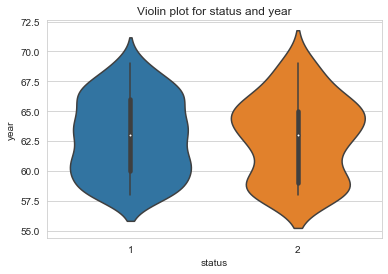

In [36]:
#Violin plot for status and year
sns.violinplot(x='status',y='year',data=HM)
plt.title("Violin plot for status and year")
plt.show()

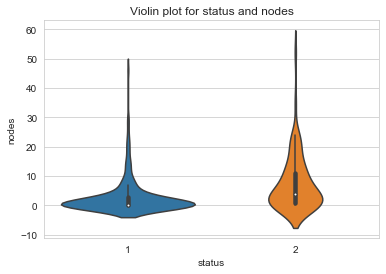

In [37]:
#Violin plot for status and nodes
sns.violinplot(x='status',y='nodes',data=HM)
plt.title('Violin plot for status and nodes')
plt.show()

# BI-VARIATE  ANALYSIS

# Scatter plots

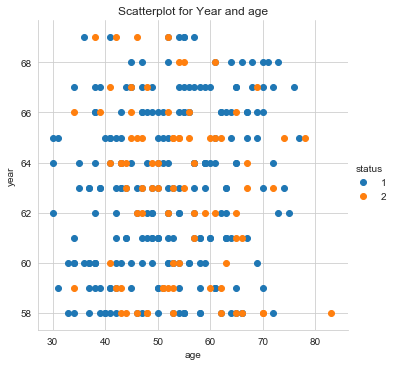

In [38]:
sns.set_style("whitegrid");
sns.FacetGrid(HM,hue='status',height=5)\
.map(plt.scatter,'age','year')\
.add_legend();
plt.title('Scatterplot for Year and age')
plt.show()

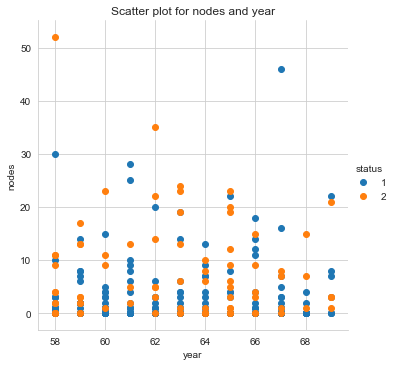

In [40]:
sns.set_style("whitegrid")
sns.FacetGrid(HM,hue='status',height=5)\
.map(plt.scatter,'year','nodes')\
.add_legend();
plt.title('Scatter plot for nodes and year')
plt.show()

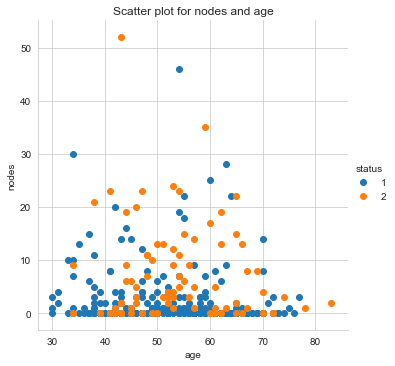

In [41]:
sns.set_style("whitegrid")
sns.FacetGrid(HM,hue='status',size=5)\
.map(plt.scatter,'age','nodes')\
.add_legend();
plt.title('Scatter plot for nodes and age')
plt.show()

### OBSERVATIONS:
    1.In each of the scatter plots, the data(points) are overlapped.
    2.Patients having age less than 40 and nodes less than 20 have more survival rate(Survived for 5 years or more).
    3.Patients having age less than 40 and year between 1958 to 1965 survived for 5 years or more
    

# Pair-plot

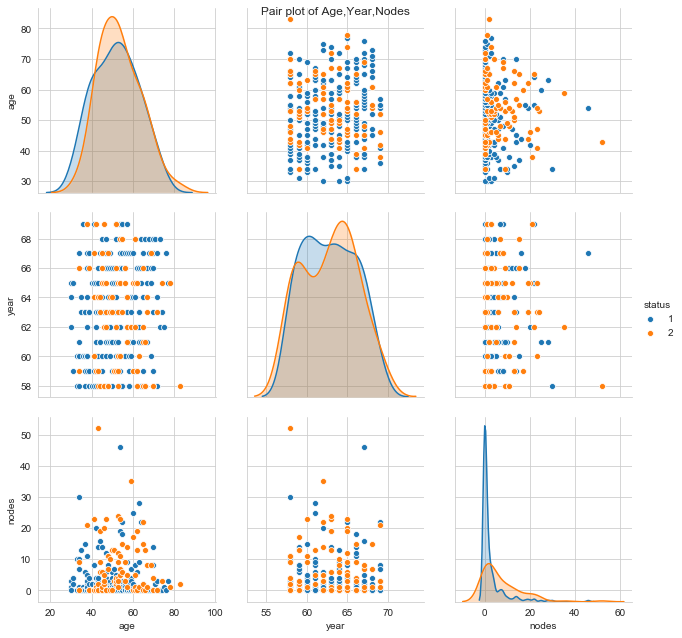

In [52]:
plt.close()
sns.set_style("whitegrid")
sns.pairplot(HM,hue='status',vars=('age','year','nodes'),height=3);
plt.suptitle('Pair plot of Age,Year,Nodes')
plt.show()

### OBSERVATION:
    In the above pair plots, as most of the points are overlapping, we cannot seperate them linearly.

# CONCLUSIONS:
    1.In the given data 'year' is not much useful for prediction or classification.
    2.However, the feature 'nodes' is more informative to classify.
    3.In most of the plots, overlapping of data points is more. So linear seperation is quite difficult.